<a href="https://colab.research.google.com/github/21Ovi/Employee-Performance-Analysis/blob/main/data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Basic Imports

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from scipy.stats import skew, kurtosis
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler,SMOTENC,SMOTE

# To avoid warnings
import warnings
warnings.filterwarnings('ignore')

## Reading Data

In [16]:
data = pd.read_excel("/content/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls")
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


## Renaming Column name to more human readable names

In [17]:
data.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [18]:
# Dropping EmpNumber as it has no impact on dependent variables
data.drop('EmpNumber',axis=1, inplace=True)

In [19]:
data.columns= ['Age', 'Gender', 'Education Background', 'Marital Status',
                'Employees Department', 'Employees Job Role', 'Business Travel Frequency',
                'Distance From Home', 'Employee Education Level', 'Employee Environment Satisfaction',
                'Employee Hourly Rate', 'Employee Job Involvement', 'Employee Job Level',
                'Employee Job Satisfaction', 'Number of Companies Worked', 'Over Time',
                'Employee Last Salary Hike Percent', 'Employee Relationship Satisfaction',
                'Total Work Experience In Years', 'Training Times Last Year',
                'Employee Work Life Balance', 'Experience Years At This Company',
                'Experience Years In Current Role', 'Years Since Last Promotion',
                'Years With Curr Manager', 'Attrition', 'Performance Rating']

#### Describing statistical informantion about data

In [20]:
data.describe()

,Age,Distance From Home,Employee Education Level,Employee Environment Satisfaction,Employee Hourly Rate,Employee Job Involvement,Employee Job Level,Employee Job Satisfaction,Number of Companies Worked,Employee Last Salary Hike Percent,Employee Relationship Satisfaction,Total Work Experience In Years,Training Times Last Year,Employee Work Life Balance,Experience Years At This Company,Experience Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Performance Rating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


#### Getting information about the data

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 1200 non-null   int64 
 1   Gender                              1200 non-null   object
 2   Education Background                1200 non-null   object
 3   Marital Status                      1200 non-null   object
 4   Employees Department                1200 non-null   object
 5   Employees Job Role                  1200 non-null   object
 6   Business Travel Frequency           1200 non-null   object
 7   Distance From Home                  1200 non-null   int64 
 8   Employee Education Level            1200 non-null   int64 
 9   Employee Environment Satisfaction   1200 non-null   int64 
 10  Employee Hourly Rate                1200 non-null   int64 
 11  Employee Job Involvement            1200 non-null   int6

## Checking for duplicate rows

In [22]:
data.duplicated().sum()

0

From info method we got idea about datatypes of features, so now filtering out `Numerical Data`

In [23]:
num_data = data[['Age','Distance From Home','Employee Hourly Rate','Number of Companies Worked','Employee Last Salary Hike Percent', 'Total Work Experience In Years',
              'Training Times Last Year','Experience Years At This Company','Experience Years In Current Role','Years Since Last Promotion',
              'Years With Curr Manager']]
num_data

,Age,Distance From Home,Employee Hourly Rate,Number of Companies Worked,Employee Last Salary Hike Percent,Total Work Experience In Years,Training Times Last Year,Experience Years At This Company,Experience Years In Current Role,Years Since Last Promotion,Years With Curr Manager
0,32,10,55,1,12,10,2,10,7,0,8
1,47,14,42,2,12,20,2,7,7,1,7
2,40,5,48,5,21,20,2,18,13,1,12
3,41,10,73,3,15,23,2,21,6,12,6
4,60,16,84,8,14,10,1,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...
1195,27,3,71,1,20,6,3,6,5,0,4
1196,37,10,80,3,17,4,2,1,0,0,0
1197,50,28,74,1,11,20,3,20,8,3,8
1198,34,9,46,1,14,9,3,8,7,7,7


## Checking Normal Distribution

The normal distribution describes a symmetrical plot of data around its mean value, where the width of the curve is defined by the standard deviation. It is visually depicted as the `bell curve`.

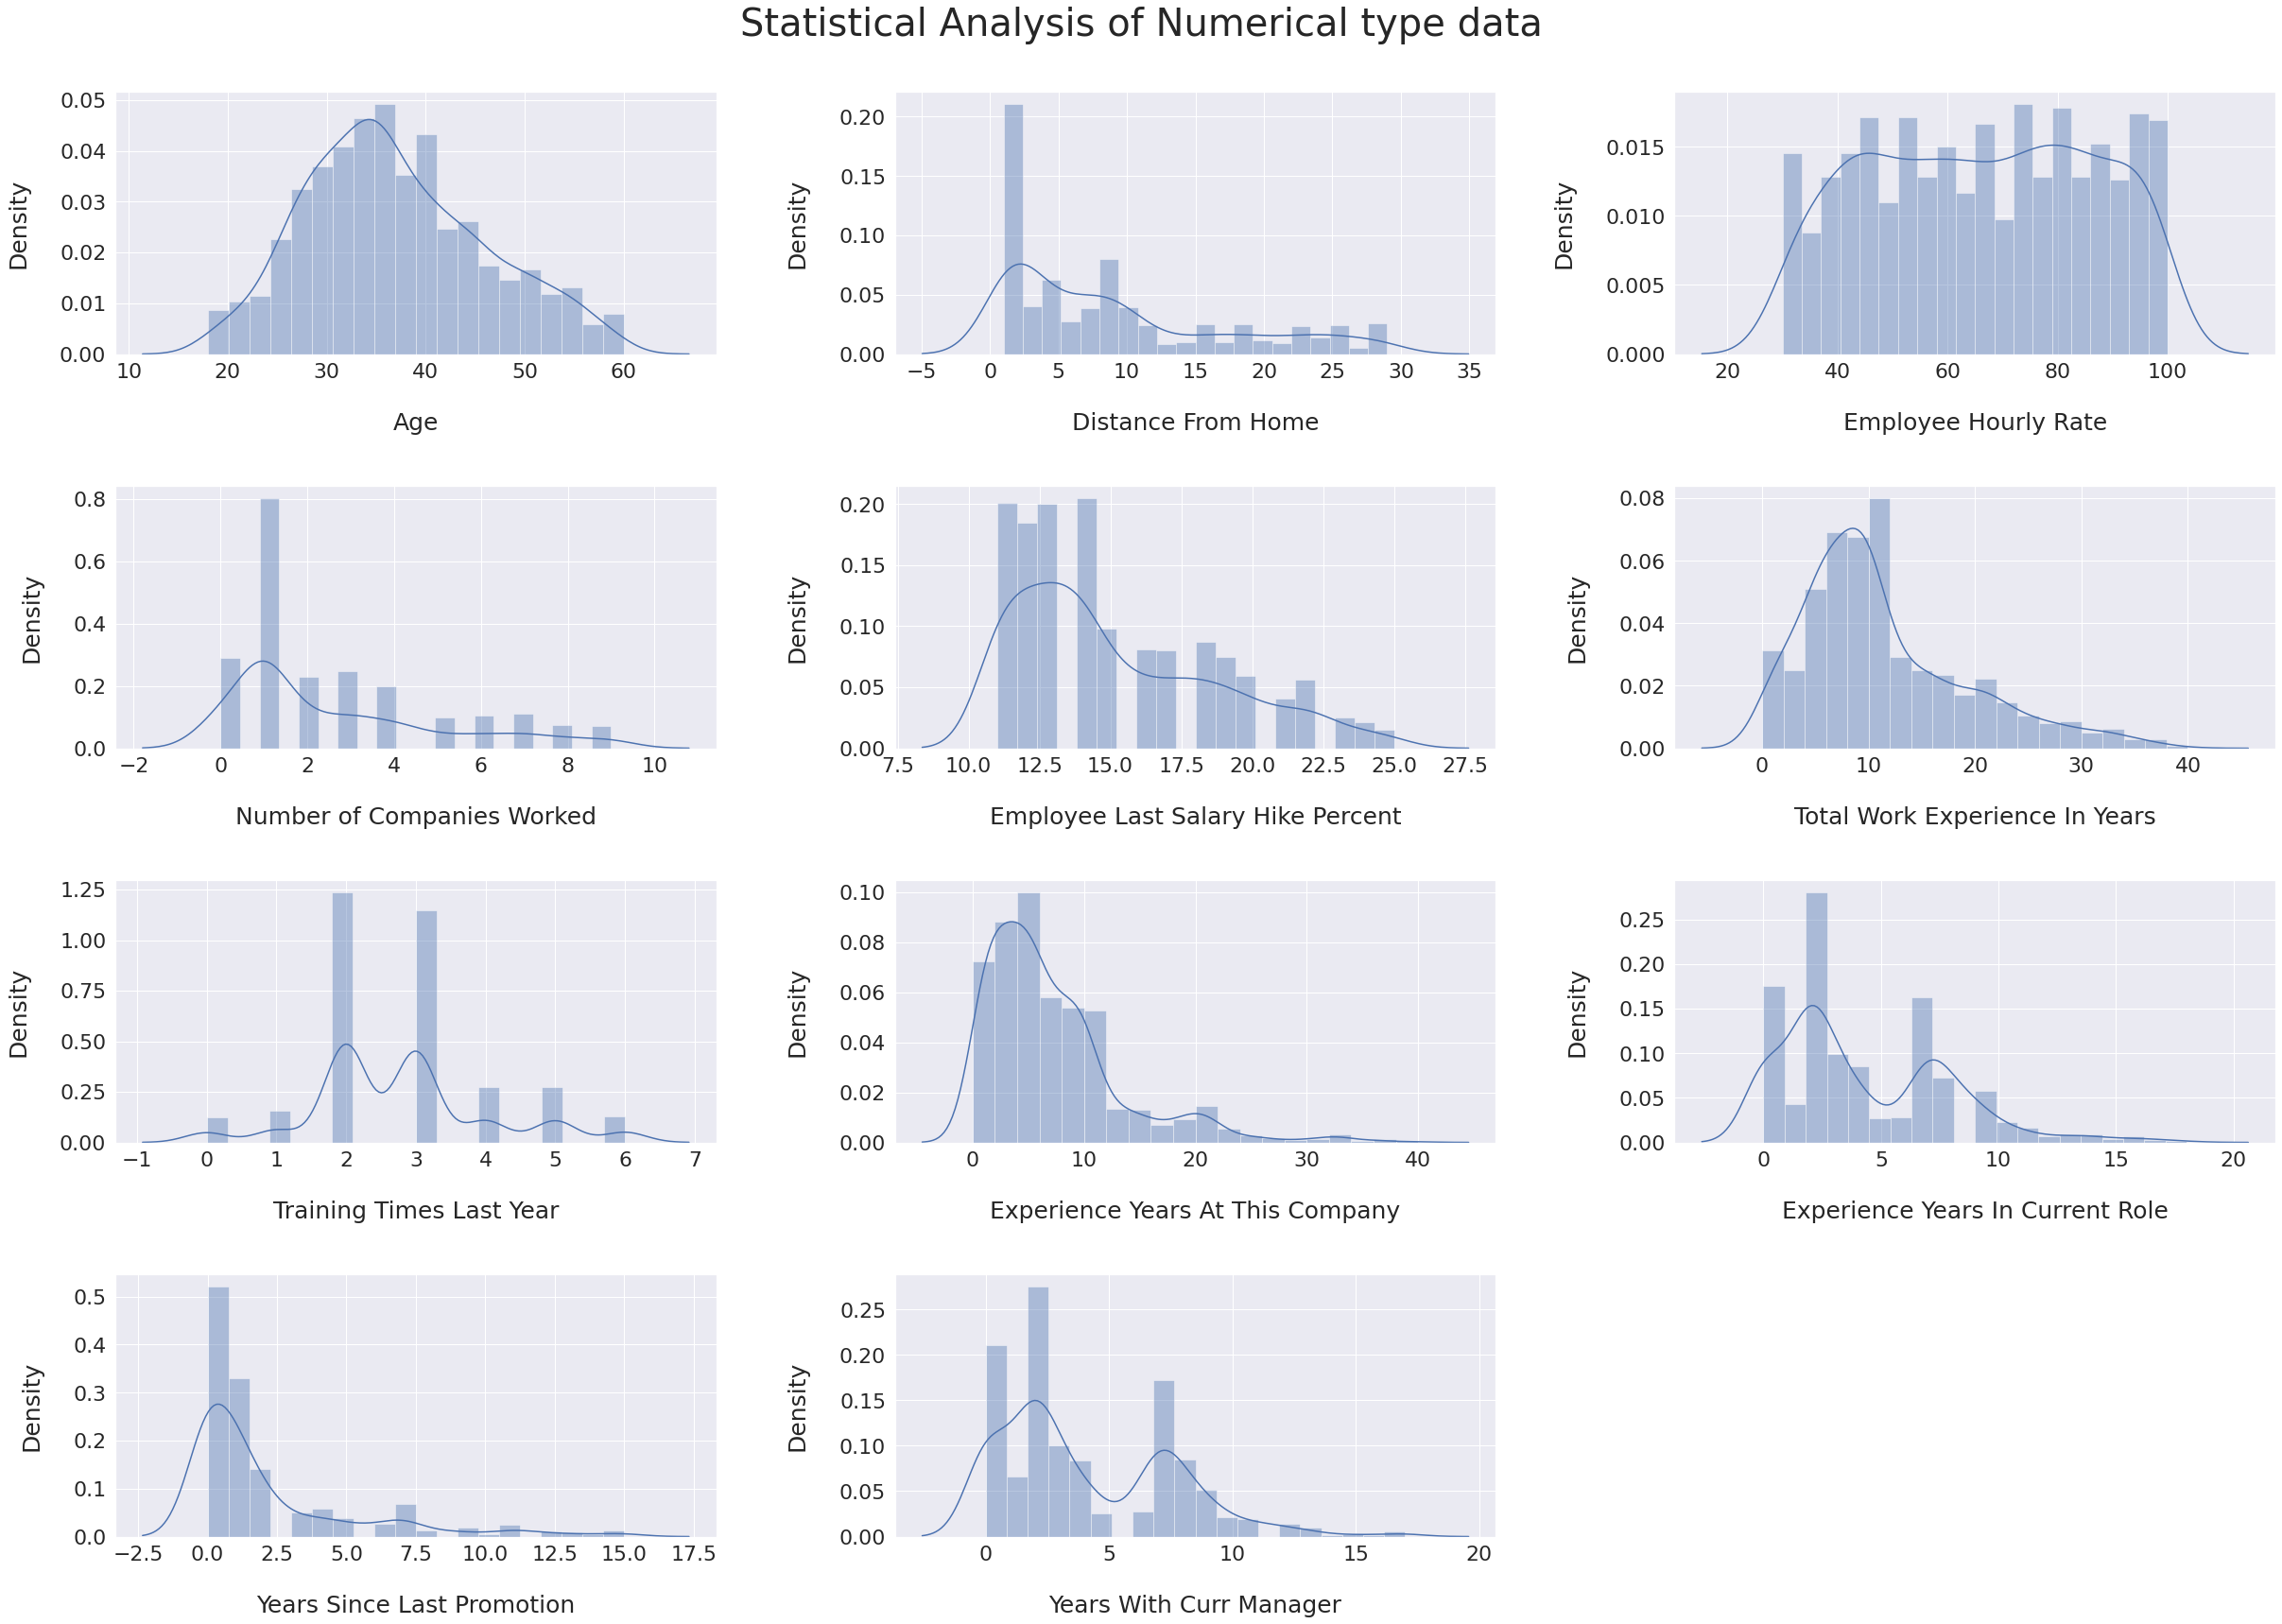

In [24]:
sns.set(rc={"font.size":15,"axes.titlesize":15,"axes.labelsize":22,"xtick.labelsize":22,"ytick.labelsize":22,
            "legend.fontsize":12})

fig = plt.figure(figsize=(35,25))
fig.suptitle("Statistical Analysis of Numerical type data", fontsize=40)
for index,col in enumerate(num_data):
    plt.subplot(4,3,index+1)
    sns.distplot(num_data.loc[:,col].dropna(),kde=True,bins=20)
    plt.xlabel(f"\n{col}",fontsize=25)
    plt.ylabel("Density\n",fontsize=25)
fig.tight_layout(pad=4.0)
fig.subplots_adjust(top=0.93)

## Defining a function for checking skewness of data

Skewness is a measure of the asymmetry of a distribution. A distribution is asymmetrical when its left and right side are not mirror images. A distribution can have right (or positive), left (or negative), or zero skewness.

In [25]:
def skewedness(data):
    skewed=[]
    for col in data:
        sk=data[col].skew()
        if(sk>=1.96 or sk<=-1.96):
            skewed.append(col)
    return skewed

print(f"\033[1mSkewed Column name : {skewedness(num_data)}")
print('\033[1mRange of skewness & kurtosis, S < |1.96|')
# Checking Kurtosis
print('\033[1mSkewness for YearsSinceLastPromotion:',skew(data['Years Since Last Promotion']))
print('\033[1mKurtosis for YearsSinceLastPromotion:',kurtosis(data['Years Since Last Promotion']))

Skewed Column name : ['Years Since Last Promotion']
Range of skewness & kurtosis, S < |1.96|
Skewness for YearsSinceLastPromotion: 1.9724620367914252
Kurtosis for YearsSinceLastPromotion: 3.5193552691799805


## Performing Operation on Skewed Data

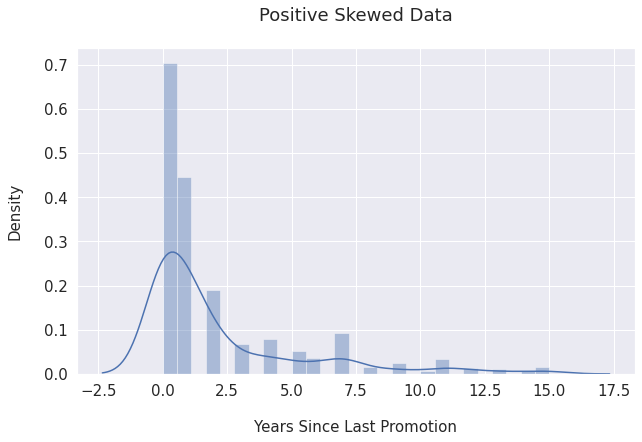

In [26]:
# Dist plot
sns.set(rc={"font.size":15,"axes.titlesize":17,"axes.labelsize":15,"xtick.labelsize":15,"ytick.labelsize":15,
            "legend.fontsize":12})
plt.figure(figsize=(10,6))
sns.distplot(num_data['Years Since Last Promotion'])
plt.xlabel("\nYears Since Last Promotion")
plt.ylabel("Density\n")
plt.title("Positive Skewed Data\n",fontsize="18")
plt.show()

## Square Root Transformation

In [28]:
# Applying square root to the skewed column ('Year Since Last Promotion)
num_data['Years Since Last Promotion'] = np.sqrt(num_data['Years Since Last Promotion'])

In [29]:
num_data['Years Since Last Promotion'].skew()

0.7350121906940618

### Checking for skewness

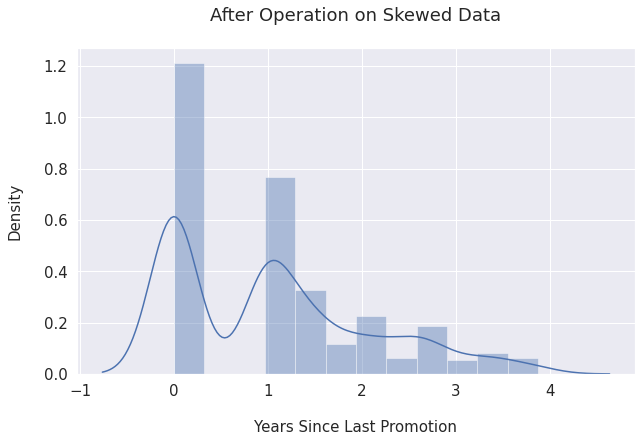

In [30]:
sns.set(rc={"font.size":15,"axes.titlesize":17,"axes.labelsize":15,"xtick.labelsize":15,"ytick.labelsize":15,
            "legend.fontsize":12})
plt.figure(figsize=(10,6))
sns.distplot(num_data['Years Since Last Promotion'])
plt.xlabel("\nYears Since Last Promotion")
plt.ylabel("Density\n")
plt.title("After Operation on Skewed Data\n",fontsize=18)
plt.show();

## Rechecking for skew data

In [31]:
print(skewedness(num_data))

[]


## Ordinal Features

Ordinal data is a categorical, statistical data type where the variables have natural, ordered categories and the distances between the categories are not known. These data exist on an ordinal scale

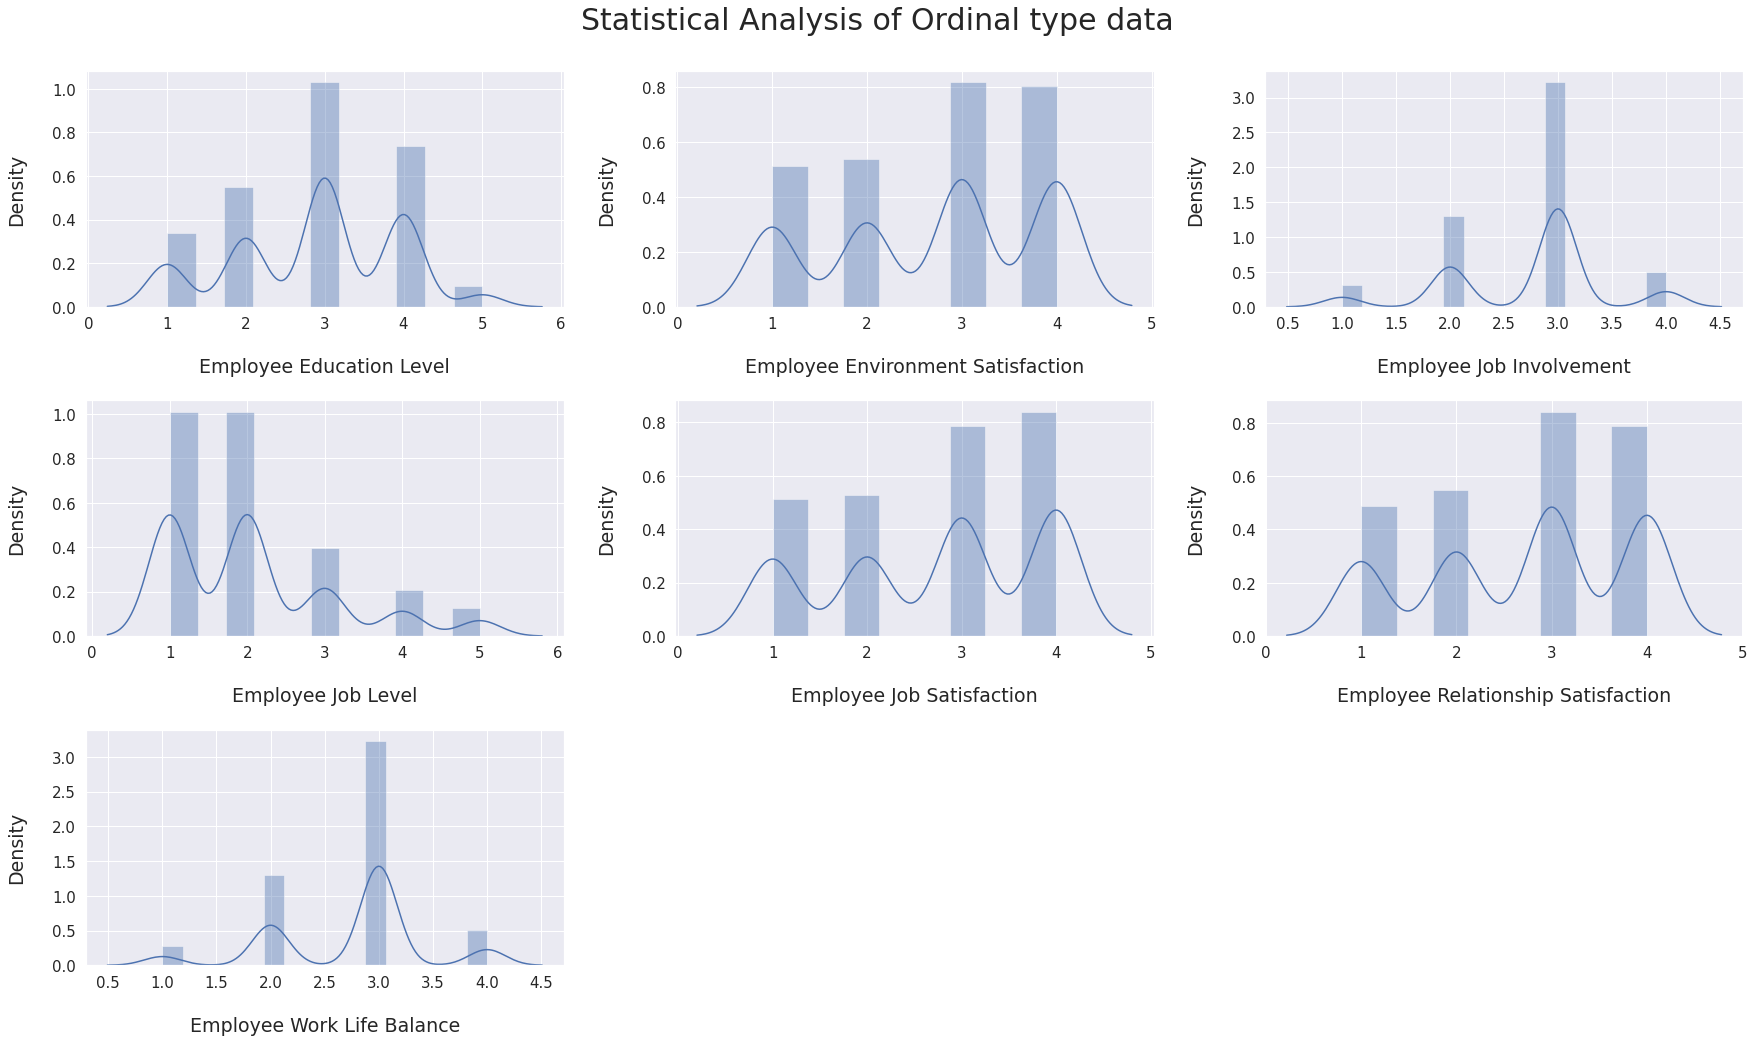

In [32]:
ord_data = data[['Employee Education Level','Employee Environment Satisfaction','Employee Job Involvement',
               'Employee Job Level','Employee Job Satisfaction','Employee Relationship Satisfaction',
               'Employee Work Life Balance']]

# figure size for the notebook
fig = plt.figure(figsize=(25,15))
fig.suptitle("Statistical Analysis of Ordinal type data", fontsize=30)
# Creating loop for ploting ordinal features
for index,cols in enumerate(ord_data):
    plt.subplot(3,3,index+1)
    sns.distplot(ord_data.loc[:,cols])
    plt.xlabel(f'\n{cols}',fontsize=19)
    plt.ylabel(f'Density\n',fontsize=19)
plt.tight_layout(pad=2)
fig.subplots_adjust(top=0.92)

## Categorical Features

Some of your features may be discrete values that aren't in an ordered relationship.

In [33]:
# Storing object type data in obj_data variable
obj_data = data.select_dtypes(include="object")
obj_data

,Gender,Education Background,Marital Status,Employees Department,Employees Job Role,Business Travel Frequency,Over Time,Attrition
0,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
1,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
2,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,Yes,No
3,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,No,No
4,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
...,...,...,...,...,...,...,...,...
1195,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,Yes,No
1196,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,No,No
1197,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,Yes,No
1198,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,No,No


## Checking for Nan and Null values (missing values)

In [42]:
# Check for Numerical data
print("Nan values :\n",num_data.isna().sum())
print("Null Values :\n",num_data.isnull().sum())

Nan values :
 Age                                  0
Distance From Home                   0
Employee Hourly Rate                 0
Number of Companies Worked           0
Employee Last Salary Hike Percent    0
Total Work Experience In Years       0
Training Times Last Year             0
Experience Years At This Company     0
Experience Years In Current Role     0
Years Since Last Promotion           0
Years With Curr Manager              0
dtype: int64
Null Values :
 Age                                  0
Distance From Home                   0
Employee Hourly Rate                 0
Number of Companies Worked           0
Employee Last Salary Hike Percent    0
Total Work Experience In Years       0
Training Times Last Year             0
Experience Years At This Company     0
Experience Years In Current Role     0
Years Since Last Promotion           0
Years With Curr Manager              0
dtype: int64


In [43]:
# Check for Ordinal data
print("Nan values :\n",ord_data.isna().sum())
print("Null Values :\n",ord_data.isnull().sum())

Nan values :
 Employee Education Level              0
Employee Environment Satisfaction     0
Employee Job Involvement              0
Employee Job Level                    0
Employee Job Satisfaction             0
Employee Relationship Satisfaction    0
Employee Work Life Balance            0
dtype: int64
Null Values :
 Employee Education Level              0
Employee Environment Satisfaction     0
Employee Job Involvement              0
Employee Job Level                    0
Employee Job Satisfaction             0
Employee Relationship Satisfaction    0
Employee Work Life Balance            0
dtype: int64


In [44]:
# Check for Categorical data
print("Nan values :\n",obj_data.isna().sum())
print("Null Values :\n",obj_data.isnull().sum())

Nan values :
 Gender                       0
Education Background         0
Marital Status               0
Employees Department         0
Employees Job Role           0
Business Travel Frequency    0
Over Time                    0
Attrition                    0
dtype: int64
Null Values :
 Gender                       0
Education Background         0
Marital Status               0
Employees Department         0
Employees Job Role           0
Business Travel Frequency    0
Over Time                    0
Attrition                    0
dtype: int64


Great, looks like we do not have a missing values in this dataset

## Creating Final Dataframe

Merging `Numerical`, `Ordinal`, `Categorical` data into one dataframe

In [45]:
processed_data = pd.concat([num_data, ord_data, obj_data, data['Performance Rating']], axis=1)
processed_data.head()

,Age,Distance From Home,Employee Hourly Rate,Number of Companies Worked,Employee Last Salary Hike Percent,Total Work Experience In Years,Training Times Last Year,Experience Years At This Company,Experience Years In Current Role,Years Since Last Promotion,...,Employee Work Life Balance,Gender,Education Background,Marital Status,Employees Department,Employees Job Role,Business Travel Frequency,Over Time,Attrition,Performance Rating
0,32,10,55,1,12,10,2,10,7,0.000000,...,2,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No,3
1,47,14,42,2,12,20,2,7,7,1.000000,...,3,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No,3
2,40,5,48,5,21,20,2,18,13,1.000000,...,3,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,Yes,No,4
3,41,10,73,3,15,23,2,21,6,3.464102,...,2,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,No,No,3
4,60,16,84,8,14,10,1,2,2,1.414214,...,3,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No,3


## Checking Outliers

 An outlier is `a data point that differs significantly from other observations`. An outlier may be due to variability in the measurement or it may indicate experimental error; the latter are sometimes excluded from the data set. An outlier can cause serious problems in statistical analyses.

Also Outliers can exists on Numerical data

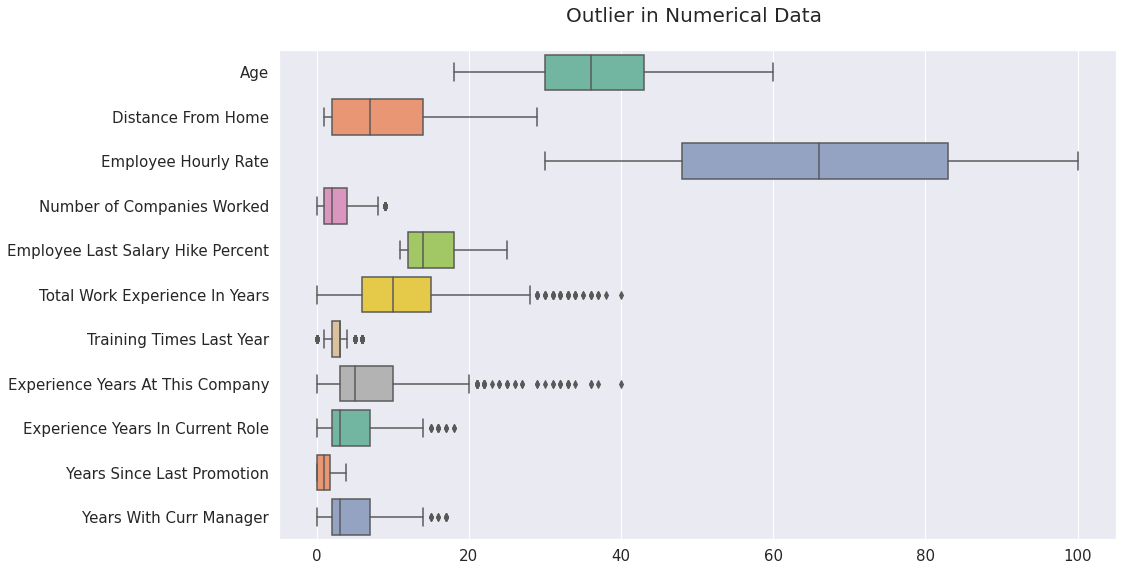

In [49]:
# Checking outlier in numerical data

plt.figure(figsize=(15,9))
sns.boxplot(data=num_data, orient="h", palette="Set2")
plt.title("Outlier in Numerical Data \n", fontsize=20)
plt.show();

These columns are having outliers:

* Number of Companies Worked
* Total Work Experience In Years
* Training Times Last Year
* Experience Years At This Company
* Experience Years In CurrentRole
* Years With Curr Manager

## Fixing Outliers one by one

let's starts with `Number of Companies Worked`

 10% quantile of Number of Companies Worked : 0.0
 90% quantile of Number of Companies Worked : 7.0


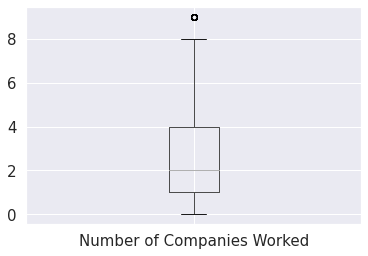

In [51]:
print(f"\033[1m 10% quantile of Number of Companies Worked : {num_data['Number of Companies Worked'].quantile(0.10)}")
print(f"\033[1m 90% quantile of Number of Companies Worked : {num_data['Number of Companies Worked'].quantile(0.90)}")
plt.show(num_data.boxplot("Number of Companies Worked"))

 Skewness of Number of Companies Worked : 0.8140421709832787


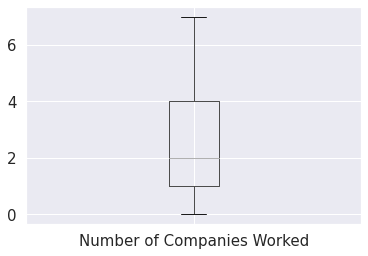

In [66]:
num_data["Number of Companies Worked"] = np.where(num_data["Number of Companies Worked"] >7.0, 7.0,num_data['Number of Companies Worked'])
t=skew(num_data["Number of Companies Worked"])
print("\033[1m Skewness of Number of Companies Worked : {}".format(t))

plt.show(num_data.boxplot("Number of Companies Worked"))

Now Fixing, `Total Work Experience In Years`

 10% quantile of Total Work Experience In Years : 3.0
 90% quantile of Total Work Experience In Years : 23.0


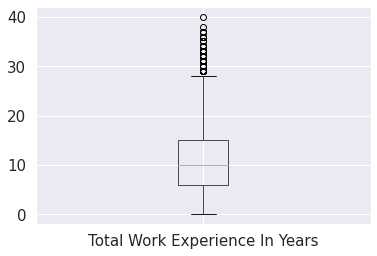

In [65]:
print(f"\033[1m 10% quantile of Total Work Experience In Years : {num_data['Total Work Experience In Years'].quantile(0.10)}")
print(f"\033[1m 90% quantile of Total Work Experience In Years : {num_data['Total Work Experience In Years'].quantile(0.90)}")
plt.show(num_data.boxplot("Total Work Experience In Years"))

 Skewness of Total Work Experience In Yearsd : 0.5337701681831295


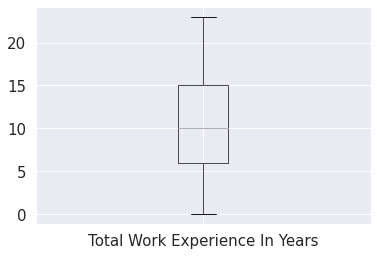

In [67]:
num_data["Total Work Experience In Years"] = np.where(num_data["Total Work Experience In Years"] >23.0, 23.0,num_data['Total Work Experience In Years'])
t=skew(num_data["Total Work Experience In Years"])
print("\033[1m Skewness of Total Work Experience In Yearsd : {}".format(t))

plt.show(num_data.boxplot("Total Work Experience In Years"))

Fixing `Training Times Last Year`

 10% quantile of Training Times Last Year : 2.0
 90% quantile of Training Times Last Year : 5.0


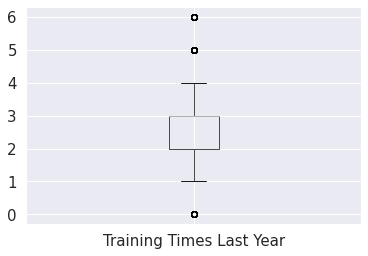

In [68]:
print(f"\033[1m 10% quantile of Training Times Last Year : {num_data['Training Times Last Year'].quantile(0.10)}")
print(f"\033[1m 90% quantile of Training Times Last Year : {num_data['Training Times Last Year'].quantile(0.90)}")

plt.show(num_data.boxplot("Training Times Last Year"))

 Skewness of Training Times Last Year : 0.0014732709380578283


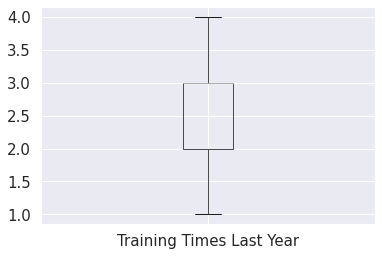

In [69]:
num_data["Training Times Last Year"] = np.where(num_data["Training Times Last Year"] <1.0, 1.0,num_data['Training Times Last Year'])
num_data["Training Times Last Year"] = np.where(num_data["Training Times Last Year"] >4.0, 4.0,num_data['Training Times Last Year'])
t=skew(num_data["Training Times Last Year"])
print("\033[1m Skewness of Training Times Last Year : {}".format(t))

plt.show(num_data.boxplot("Training Times Last Year"))

Fixing `Experience Years At This Company`

 10% quantile of Experience Years At This Company : 1.0
 10% quantile of Experience Years At This Company : 15.0


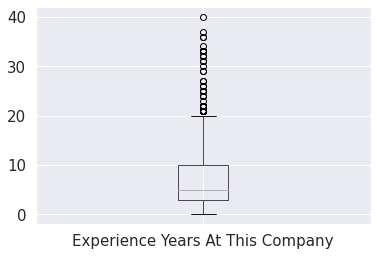

In [70]:
print(f"\033[1m 10% quantile of Experience Years At This Company : {num_data['Experience Years At This Company'].quantile(0.10)}")
print(f"\033[1m 10% quantile of Experience Years At This Company : {num_data['Experience Years At This Company'].quantile(0.90)}")

plt.show(num_data.boxplot("Experience Years At This Company"))

 Skewness of Experience Years At This Company : 0.573319644340013


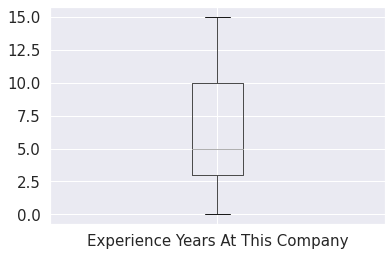

In [71]:
num_data["Experience Years At This Company"] = np.where(num_data["Experience Years At This Company"] >15.0, 15.0,num_data['Experience Years At This Company'])
t=skew(num_data["Experience Years At This Company"])
print("\033[1m Skewness of Experience Years At This Company : {}".format(t))

plt.show(num_data.boxplot("Experience Years At This Company"))

Fixing `Experience Years In Current Role`

 10% quantile of Experience Years In Current Role : 0.0
 90% quantile of Experience Years In Current Role : 9.0


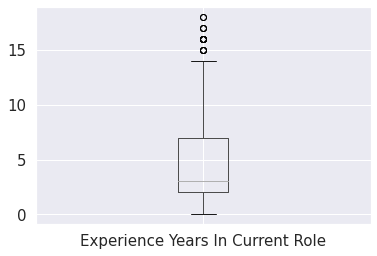

In [72]:
print(f"\033[1m 10% quantile of Experience Years In Current Role : {num_data['Experience Years In Current Role'].quantile(0.10)}")
print(f"\033[1m 90% quantile of Experience Years In Current Role : {num_data['Experience Years In Current Role'].quantile(0.90)}")

plt.show(num_data.boxplot("Experience Years In Current Role"))

 Skewness of Experience Years In Current Role : 0.3070756306977393


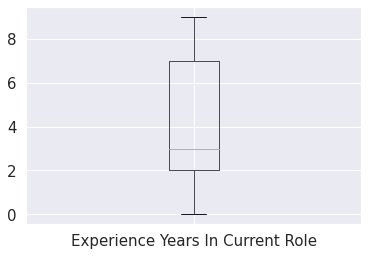

In [73]:
num_data["Experience Years In Current Role"] = np.where(num_data["Experience Years In Current Role"] >9.0, 9.0,num_data['Experience Years In Current Role'])
t=skew(num_data["Experience Years In Current Role"])
print("\033[1m Skewness of Experience Years In Current Role : {}".format(t))

plt.show(num_data.boxplot("Experience Years In Current Role"))

Fixing `Years With Curr Manager`

 10% quantile of Years With Curr Manager : 0.0
 10% quantile of Years With Curr Manager : 9.0


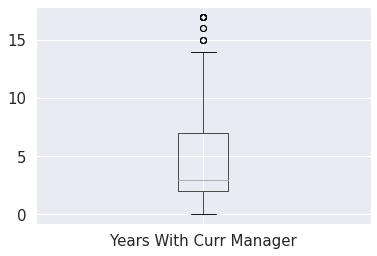

In [74]:
print(f"\033[1m 10% quantile of Years With Curr Manager : {num_data['Years With Curr Manager'].quantile(0.10)}")
print(f"\033[1m 10% quantile of Years With Curr Manager : {num_data['Years With Curr Manager'].quantile(0.90)}")

plt.show(num_data.boxplot("Years With Curr Manager"))

 Skewness of Years With Curr Manager : 0.3378734233306521


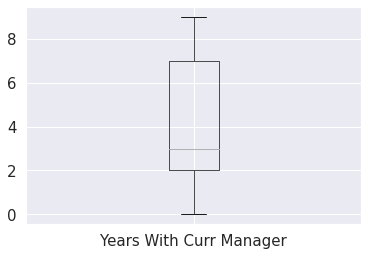

In [75]:
num_data["Years With Curr Manager"] = np.where(num_data["Years With Curr Manager"] >9.0, 9.0,num_data['Years With Curr Manager'])
t=skew(num_data["Years With Curr Manager"])
print("\033[1m Skewness of Years With Curr Manager : {}".format(t))

plt.show(num_data.boxplot("Years With Curr Manager"))

## Rechecking Outliers in `Numerical Data` after fixing

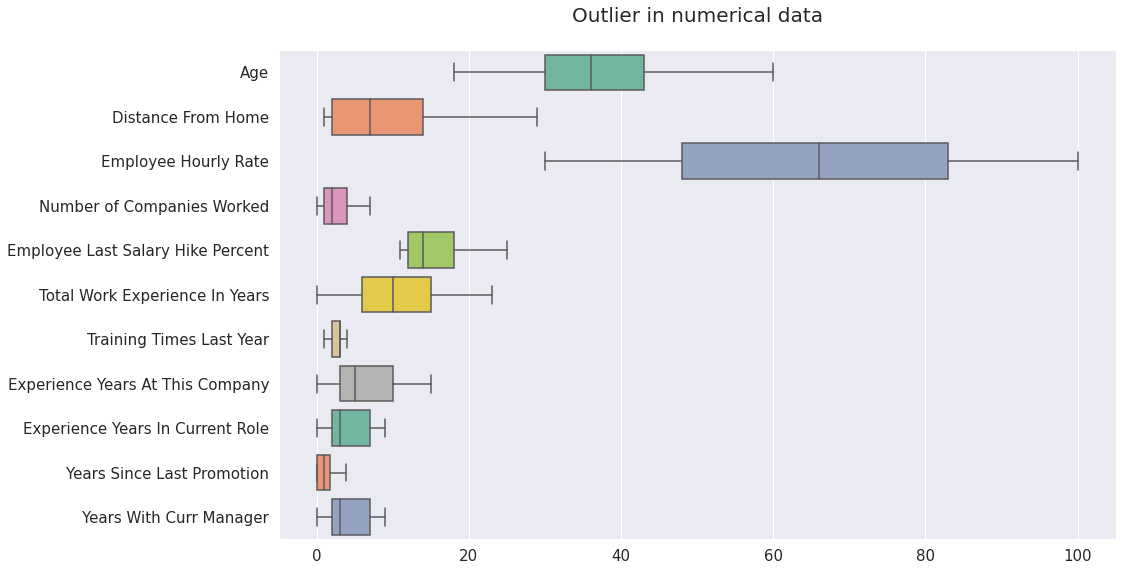

In [76]:
plt.figure(figsize=(15,9))
sns.boxplot(data=num_data, orient="h", palette="Set2")
plt.title("Outlier in numerical data\n",fontsize=20)
plt.show()

## Label Encoding

ML algorithm don't process with object type data so we have to convert object type data into numerical type data.

In [80]:
# Converting Labeled data to Numerical data using label Encoder

label = LabelEncoder()
processed_data[['Gender', 'Education Background', 'Marital Status','Employees Department', 'Employees Job Role',
       'Business Travel Frequency', 'Over Time', 'Attrition']] = processed_data[['Gender', 'Education Background', 
       'Marital Status','Employees Department', 'Employees Job Role','Business Travel Frequency', 'Over Time', 
       'Attrition']].apply(label.fit_transform)

### After Encoding data

In [81]:
processed_data.head()

,Age,Distance From Home,Employee Hourly Rate,Number of Companies Worked,Employee Last Salary Hike Percent,Total Work Experience In Years,Training Times Last Year,Experience Years At This Company,Experience Years In Current Role,Years Since Last Promotion,...,Employee Work Life Balance,Gender,Education Background,Marital Status,Employees Department,Employees Job Role,Business Travel Frequency,Over Time,Attrition,Performance Rating
0,32,10,55,1,12,10,2,10,7,0.000000,...,2,1,2,2,5,13,2,0,0,3
1,47,14,42,2,12,20,2,7,7,1.000000,...,3,1,2,2,5,13,2,0,0,3
2,40,5,48,5,21,20,2,18,13,1.000000,...,3,1,1,1,5,13,1,1,0,4
3,41,10,73,3,15,23,2,21,6,3.464102,...,2,1,0,0,3,8,2,0,0,3
4,60,16,84,8,14,10,1,2,2,1.414214,...,3,1,2,2,5,13,2,0,0,3


## Splitting dataset into `Independent Variables (Features) ` and `Dependent Variables (Target or Label) sets`

In [86]:
# defing Independent variables as X
X = processed_data.drop('Performance Rating', axis=1)
# Defing Target variable or dependent variable
y = processed_data['Performance Rating']
X.head()

,Age,Distance From Home,Employee Hourly Rate,Number of Companies Worked,Employee Last Salary Hike Percent,Total Work Experience In Years,Training Times Last Year,Experience Years At This Company,Experience Years In Current Role,Years Since Last Promotion,...,Employee Relationship Satisfaction,Employee Work Life Balance,Gender,Education Background,Marital Status,Employees Department,Employees Job Role,Business Travel Frequency,Over Time,Attrition
0,32,10,55,1,12,10,2,10,7,0.000000,...,4,2,1,2,2,5,13,2,0,0
1,47,14,42,2,12,20,2,7,7,1.000000,...,4,3,1,2,2,5,13,2,0,0
2,40,5,48,5,21,20,2,18,13,1.000000,...,3,3,1,1,1,5,13,1,1,0
3,41,10,73,3,15,23,2,21,6,3.464102,...,2,2,1,0,0,3,8,2,0,0
4,60,16,84,8,14,10,1,2,2,1.414214,...,4,3,1,2,2,5,13,2,0,0


## Checking for Imbalance Data

A classification data set with skewed class proportions is called imbalanced. Classes that make up a large proportion of the data set are called majority classes. Those that make up a smaller proportion are minority classes.

In [88]:
y.value_counts(normalize=True)*100

3    72.833333
2    16.166667
4    11.000000
Name: Performance Rating, dtype: float64

Look like we got `imbalanced data`, so now balancing the data....

## Handling Imbalanced Data
### Converting Imbalance data into balanced data

* Balancing data with SMOTE Technique gives more number of NaN values.
* so, we use RandomOverSampler Technique to balance the data.

In [96]:
# Intilizing the model
oversampling = RandomOverSampler(sampling_strategy='auto', random_state=0)

X_smote, y_smote = oversampling.fit_resample(X, y)
X_smote = pd.DataFrame(X_smote)
X_smote.columns = ['Age', 'Distance From Home', 'Employee Hourly Rate',
       'Number of Companies Worked', 'Employee Last Salary Hike Percent',
       'Total Work Experience In Years', 'Training Times Last Year',
       'Experience Years At This Company', 'Experience Years In Current Role',
       'Years Since Last Promotion', 'Years With Curr Manager',
       'Employee Education Level', 'Employee Environment Satisfaction',
       'Employee Job Involvement', 'Employee Job Level',
       'Employee Job Satisfaction', 'Employee Relationship Satisfaction',
       'Employee Work Life Balance', 'Gender', 'Education Background',
       'Marital Status', 'Employees Department', 'Employees Job Role',
       'Business Travel Frequency', 'Over Time', 'Attrition']
X_smote.head(3)

,Age,Distance From Home,Employee Hourly Rate,Number of Companies Worked,Employee Last Salary Hike Percent,Total Work Experience In Years,Training Times Last Year,Experience Years At This Company,Experience Years In Current Role,Years Since Last Promotion,...,Employee Relationship Satisfaction,Employee Work Life Balance,Gender,Education Background,Marital Status,Employees Department,Employees Job Role,Business Travel Frequency,Over Time,Attrition
0,32,10,55,1,12,10,2,10,7,0.0,...,4,2,1,2,2,5,13,2,0,0
1,47,14,42,2,12,20,2,7,7,1.0,...,4,3,1,2,2,5,13,2,0,0
2,40,5,48,5,21,20,2,18,13,1.0,...,3,3,1,1,1,5,13,1,1,0


In [93]:
y_smote.value_counts(normalize=True)*100

3    33.333333
4    33.333333
2    33.333333
Name: Performance Rating, dtype: float64

### Now our data is `Balanced` and cleaned hence, we can say our data is `preprocessed`.

Now, `Merging` `X_smote` and `y_smote` into a final dataset

In [97]:
preprocessed_data = pd.concat([X_smote ,y_smote ],axis=1)

preprocessed_data.head()

,Age,Distance From Home,Employee Hourly Rate,Number of Companies Worked,Employee Last Salary Hike Percent,Total Work Experience In Years,Training Times Last Year,Experience Years At This Company,Experience Years In Current Role,Years Since Last Promotion,...,Employee Work Life Balance,Gender,Education Background,Marital Status,Employees Department,Employees Job Role,Business Travel Frequency,Over Time,Attrition,Performance Rating
0,32,10,55,1,12,10,2,10,7,0.000000,...,2,1,2,2,5,13,2,0,0,3
1,47,14,42,2,12,20,2,7,7,1.000000,...,3,1,2,2,5,13,2,0,0,3
2,40,5,48,5,21,20,2,18,13,1.000000,...,3,1,1,1,5,13,1,1,0,4
3,41,10,73,3,15,23,2,21,6,3.464102,...,2,1,0,0,3,8,2,0,0,3
4,60,16,84,8,14,10,1,2,2,1.414214,...,3,1,2,2,5,13,2,0,0,3


## Exporting Dataset

In [98]:
preprocessed_data.to_csv('preprocessed_data.csv', index=False, sep=';', encoding='utf-8')

Now Our dataset is cleaned and exported and ready for Modelling.